In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


In [2]:
# Store filepath in a variable
file = Path("data/us-states.csv")

In [3]:
data = pd.read_csv(file)
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485


## SUMMARY

In [4]:
# Total number of unique STATES
states_count = len(data['state'].unique())
states_count

56

In [5]:
states_group_cases = data.groupby('state')['cases'].max()
states_group_cases

state
Alabama                      1648385
Alaska                        308893
American Samoa                  8321
Arizona                      2451062
Arkansas                     1008303
California                  12169158
Colorado                     1771010
Connecticut                   978456
Delaware                      332861
District of Columbia          178226
Florida                      7542869
Georgia                      2984923
Guam                           62077
Hawaii                        372408
Idaho                         522919
Illinois                     4107931
Indiana                      2054533
Iowa                          907421
Kansas                        940815
Kentucky                     1723443
Louisiana                    1580709
Maine                         319997
Maryland                     1369930
Massachusetts                2230150
Michigan                     3068195
Minnesota                    1784263
Mississippi                   99

In [6]:
states_group_deaths = data.groupby('state')['deaths'].max()
states_group_deaths

state
Alabama                      21631
Alaska                        1438
American Samoa                  34
Arizona                      33190
Arkansas                     13068
California                  104277
Colorado                     14245
Connecticut                  12270
Delaware                      3352
District of Columbia          1487
Florida                      87141
Georgia                      41055
Guam                           421
Hawaii                        1851
Idaho                         5456
Illinois                     41618
Indiana                      26179
Iowa                         10770
Kansas                       10232
Kentucky                     18348
Louisiana                    18835
Maine                         2981
Maryland                     16672
Massachusetts                24441
Michigan                     42311
Minnesota                    14964
Mississippi                  13431
Missouri                     23998
Montana       

In [7]:
cases_count = states_group_cases.sum()
cases_count

103910034

In [8]:
deaths_count = states_group_deaths.sum()
deaths_count

1135432

In [9]:
# Average number of cases all states
cases_mean = states_group_cases.mean()
cases_mean

1855536.3214285714

In [10]:
# Average number of deaths all states
death_mean = states_group_deaths.mean()
death_mean

20275.571428571428

In [11]:
data_Fl_df = data[(data["state"]=="Florida")]
data_Fl_df

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
304,2020-03-05,Florida,12,4,0
...,...,...,...,...,...
61672,2023-03-19,Florida,12,7542869,87141
61728,2023-03-20,Florida,12,7542869,87141
61784,2023-03-21,Florida,12,7542869,87141
61840,2023-03-22,Florida,12,7542869,87141


In [12]:
# Total number of cases for Florida
cases_count_Fl = data_Fl_df['cases'].max()
cases_count_Fl

7542869

In [13]:
# Total number of deaths for Florida
deaths_count_Fl = data_Fl_df['deaths'].max()
deaths_count_Fl

87141

In [14]:
# Total number of deaths for Florida
days_count_Fl = len(data_Fl_df['date'])
days_count_Fl

1118

In [15]:
# Average number of cases by day for Florida
cases_mean_Fl = cases_count_Fl / days_count_Fl
cases_mean_Fl

6746.752236135957

In [16]:
# Average number of deaths by day for Florida
deaths_mean_Fl = deaths_count_Fl / days_count_Fl
deaths_mean_Fl

77.94364937388193

In [17]:
# % of FL cases over the total states 
percent_FL_cases = cases_count_Fl/ cases_count * 100
percent_FL_cases

7.25903814062846

In [18]:
# % of FL deaths over the total states 
percent_FL_deaths = deaths_count_Fl/ deaths_count * 100
percent_FL_deaths

7.674700026069373

In [19]:
# Summary STATS of the EDA in a DataFrame
FL_STATS_summary = pd.DataFrame({"Total Cases":[cases_count_Fl],
                                 "Total Deaths":[deaths_count_Fl],
                                 "Average Cases by day":[cases_mean_Fl],
                                 "Average Deaths by day":[deaths_mean_Fl],
                                 "% Cases FLorida":[percent_FL_cases],
                                 "% Deaths Florida":[percent_FL_deaths],})

# Formatting
FL_STATS_summary["Total Cases"] = FL_STATS_summary["Total Cases"].map("{:,}".format)
FL_STATS_summary["Total Deaths"] = FL_STATS_summary["Total Deaths"].map("{:,}".format)
FL_STATS_summary["Average Cases by day"] = FL_STATS_summary["Average Cases by day"].map("{:,.2f}".format)
FL_STATS_summary["Average Deaths by day"] = FL_STATS_summary["Average Deaths by day"].map("{:,.2f}".format)

# Display the DataFrame
FL_STATS_summary

,Total Cases,Total Deaths,Average Cases by day,Average Deaths by day,% Cases FLorida,% Deaths Florida
0,"7,542,869","87,141","6,746.75",77.94,7.259038,7.6747


## CLEAN DATA

In [20]:
data_Fl_df.to_csv("Output/data_FL.csv", index=False, header=True)

In [21]:
#Identify the duplicate data
duplicates = data_Fl_df[data_Fl_df.duplicated(subset=['cases','deaths'], keep=False)]
duplicates

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
12123,2020-10-09,Florida,12,728913,15185
...,...,...,...,...,...
61672,2023-03-19,Florida,12,7542869,87141
61728,2023-03-20,Florida,12,7542869,87141
61784,2023-03-21,Florida,12,7542869,87141
61840,2023-03-22,Florida,12,7542869,87141


In [22]:
duplicates.to_csv("Output/data_FL_duplicates.csv", index=False, header=True)

In [23]:
# Identify incomplete rows
data_Fl_df.count()

date      1118
state     1118
fips      1118
cases     1118
deaths    1118
dtype: int64

In [24]:
# Drop duplicates for cases and deaths rows
data_Fl_clean_df = data_Fl_df.drop_duplicates(subset=['cases', 'deaths'])
data_Fl_clean_df

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
304,2020-03-05,Florida,12,4,0
325,2020-03-06,Florida,12,7,2
354,2020-03-07,Florida,12,12,2
...,...,...,...,...,...
58424,2023-01-20,Florida,12,7400419,84927
59208,2023-02-03,Florida,12,7440322,85710
59992,2023-02-17,Florida,12,7473371,86294
60776,2023-03-03,Florida,12,7531055,86850


In [25]:
data_Fl_clean_df.to_csv("Output/data_FL_clean.csv", index=False, header=True)

In [26]:
data_Fl_clean_df.count()

date      839
state     839
fips      839
cases     839
deaths    839
dtype: int64

In [27]:
# Convert the date column to datetime 
data_Fl_df_month = data_Fl_df.assign(date=pd.to_datetime(data_Fl_df['date']))

# Group by month 
monthly_data_Fl = data_Fl_df_month.groupby(data_Fl_df_month['date'].dt.to_period("M")).agg({
    'state': 'first',  
    'fips': 'first',   
    'cases': 'max',
    'deaths': 'max'
})

# Reset the index to have a proper DataFrame structure
monthly_data_Fl.reset_index(inplace=True)

# Display the resulting DataFrame
monthly_data_Fl

,date,state,fips,cases,deaths
0,2020-03,Florida,12,6742,85
1,2020-04,Florida,12,33683,1267
2,2020-05,Florida,12,56155,2450
3,2020-06,Florida,12,152426,3504
4,2020-07,Florida,12,470378,6842
5,2020-08,Florida,12,623463,11186
6,2020-09,Florida,12,706508,14316
7,2020-10,Florida,12,802539,16760
8,2020-11,Florida,12,999311,18596
9,2020-12,Florida,12,1323307,21672


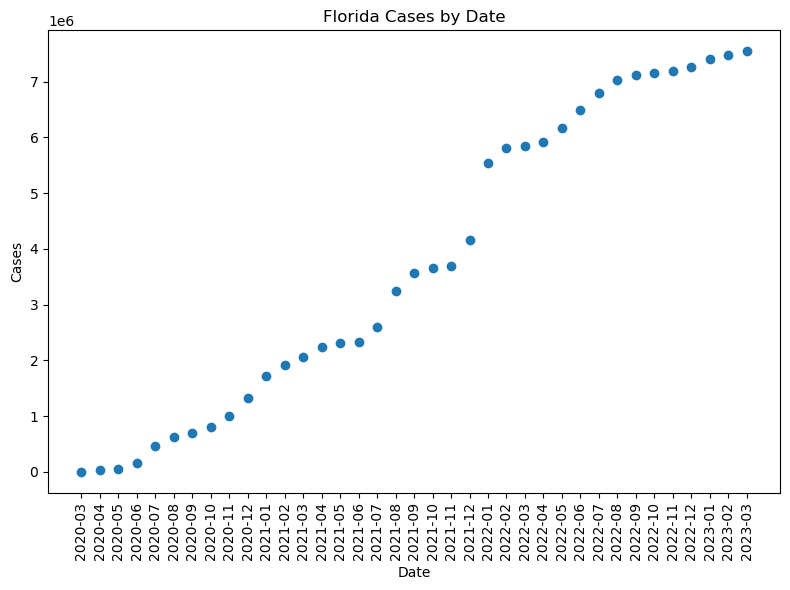

In [28]:
# Convert the date column to strings
x_values = monthly_data_Fl['date'].astype(str)

# cases column for y axis
y_values = monthly_data_Fl['cases']

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Florida Cases by Date')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
# date column converted to datetime
data_Fl_df_copy = data_Fl_df.copy()
data_Fl_df_copy["date"] = pd.to_datetime(data_Fl_df_copy["date"])

# Group by year
yearly_data_Fl = data_Fl_df_copy.groupby(data_Fl_df_copy["date"].dt.year).agg({
    'state': 'first',
    'fips': 'first',
    'cases': 'max',
    'deaths': 'max'
})

# Reset the index to have a proper DataFrame structure
yearly_data_Fl.reset_index(inplace=True)

# Rename the 'date' column to 'year'
yearly_data_Fl.rename(columns={"date": "year"}, inplace=True)

# Display the resulting DataFrame
yearly_data_Fl

,year,state,fips,cases,deaths
0,2020,Florida,12,1323307,21672
1,2021,Florida,12,4166392,62504
2,2022,Florida,12,7269428,83911
3,2023,Florida,12,7542869,87141


Text(0.5, 1.0, 'Number of cases in selected states')

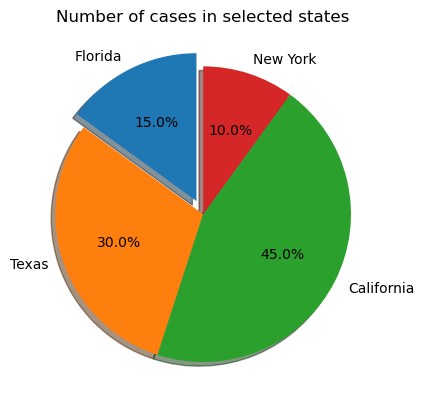

In [30]:
# Plot pie chart of states and label the slices
labels= "Florida", "Texas", "California", "New York"
sizes = [15,30,45,10]
# fig, ax = plt.subplots()
explode = (0.1,0, 0, 0) # only "explode" Florida slide
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.set_title("Number of cases in selected states")

Text(0, 0.5, 'Deaths')

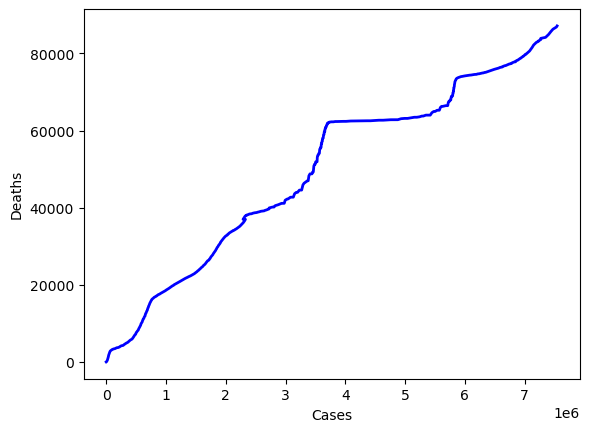

In [31]:
# Generate a line plot of Florida cases vs. Florida deaths.

data_Fl_df.head()
x_axis = data_Fl_df["cases"]
tumsiz = data_Fl_df["deaths"]

fig1, ax1 = plt.subplots()
plt.title=('Florida cases vs.deaths')
plt.plot(x_axis, tumsiz, linewidth=2, color= "blue")
plt.xlabel("Cases")
plt.ylabel("Deaths")

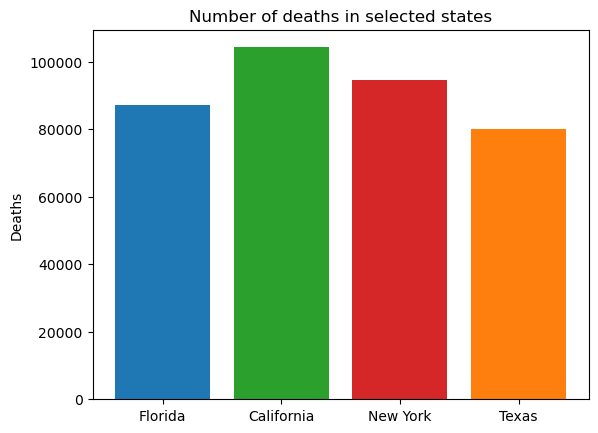

In [32]:
# Generate a bar of number of deaths in Florida, California, New York, Texas

fig, ax = plt.subplots()

states = ['Florida', 'California', 'New York', 'Texas']
counts = [87141, 104277, 94518, 80138]
bar_labels = ['blue', 'green', 'red', 'orange']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange']

ax.bar(states, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Deaths')
ax.set_title('Number of deaths in selected states')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

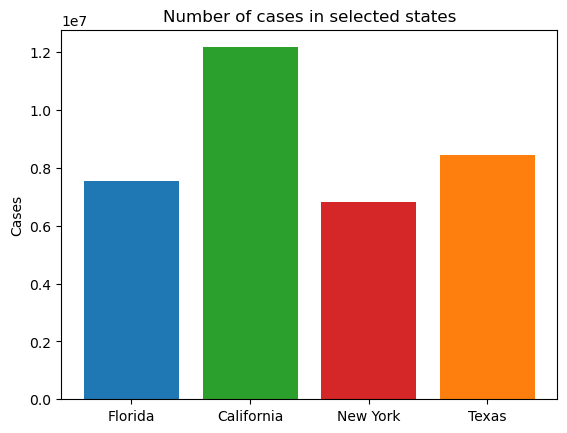

In [33]:
# Generate a bar of number of cases in Florida, California, New York and Texas
fig, ax = plt.subplots()
states = ['Florida', 'California', 'New York', 'Texas']
counts = [7542869, 12169158, 6805271, 8447168]
bar_labels = ['blue', 'green', 'red', 'orange']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange']
ax.bar(states, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Cases')
ax.set_title('Number of cases in selected states')
plt.show

In [34]:

df = data

#  datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df = df.sort_values(by='date')

# Calculate daily new cases and deaths
df['daily_new_cases'] = df.groupby('state')['cases'].diff().fillna(0)
df['daily_new_deaths'] = df.groupby('state')['deaths'].diff().fillna(0)

#dataframe
df

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths
0,2020-01-21,Washington,53,1,0,0.0,0.0
1,2020-01-22,Washington,53,1,0,0.0,0.0
2,2020-01-23,Washington,53,1,0,0.0,0.0
3,2020-01-24,Illinois,17,1,0,0.0,0.0
4,2020-01-24,Washington,53,1,0,0.0,0.0
...,...,...,...,...,...,...,...
61908,2023-03-23,Maryland,24,1369930,16672,412.0,5.0
61909,2023-03-23,Massachusetts,25,2230150,24441,2540.0,50.0
61910,2023-03-23,Michigan,26,3068195,42311,0.0,0.0
61912,2023-03-23,Mississippi,28,993035,13431,0.0,14.0


In [35]:
df_fl_day = df[(df["state"]=="Florida")]
df_fl_day
# Drop duplicates for cases and deaths rows
data_Fl_clean_df_day = df_fl_day.drop_duplicates(subset=['daily_new_cases', 'daily_new_deaths'])
data_Fl_clean_df_day

,date,state,fips,cases,deaths,daily_new_cases,daily_new_deaths
242,2020-03-01,Florida,12,2,0,0.0,0.0
270,2020-03-03,Florida,12,3,0,1.0,0.0
325,2020-03-06,Florida,12,7,2,3.0,2.0
354,2020-03-07,Florida,12,12,2,5.0,0.0
460,2020-03-10,Florida,12,23,2,9.0,0.0
...,...,...,...,...,...,...,...
58424,2023-01-20,Florida,12,7400419,84927,50242.0,751.0
59208,2023-02-03,Florida,12,7440322,85710,39903.0,783.0
59992,2023-02-17,Florida,12,7473371,86294,33049.0,584.0
60776,2023-03-03,Florida,12,7531055,86850,57684.0,556.0


In [36]:
#statistical Test for number of cases
FL_STATS_summary = data_Fl_clean_df_day.set_index(["state"])
FL_STATS_groupby = FL_STATS_summary.groupby("state")
FL_STATS_mean = FL_STATS_groupby["daily_new_cases"].mean()
FL_STATS_med = FL_STATS_groupby["daily_new_cases"].median()
FL_STATS_var = FL_STATS_groupby["daily_new_cases"].var()
FL_STATS_std = FL_STATS_groupby["daily_new_cases"].std()
FL_STATS_sem = FL_STATS_groupby["daily_new_cases"].sem()
#
FL_STATS_df = pd.DataFrame({"Mean Number of Cases": FL_STATS_mean,
                           "Median Number of Cases":FL_STATS_med,
                           "Variance of Cases":FL_STATS_var,
                           "STD Number of Cases": FL_STATS_std})
FL_STATS_df

,Mean Number of Cases,Median Number of Cases,Variance of Cases,STD Number of Cases
state,,,,
Florida,9052.61899,5099.0,2.073072e+08,14398.167404


In [37]:
#Statistical test for Number of Deaths
FL_STATS_summary = data_Fl_clean_df_day.set_index(["state"])
FL_STATS_groupby = FL_STATS_summary.groupby("state")
FL_STATS_mean = FL_STATS_groupby["daily_new_deaths"].mean()
FL_STATS_med = FL_STATS_groupby["daily_new_deaths"].median()
FL_STATS_var = FL_STATS_groupby["daily_new_deaths"].var()
FL_STATS_std = FL_STATS_groupby["daily_new_deaths"].std()
FL_STATS_sem = FL_STATS_groupby["daily_new_deaths"].sem()
#
FL_STATS_df = pd.DataFrame({"Mean Number of Deaths": FL_STATS_mean,
                           "Median Number of Deaths":FL_STATS_med,
                           "Variance Number of Deaths":FL_STATS_var,
                           "STD Number of Deaths": FL_STATS_std})
FL_STATS_df


,Mean Number of Deaths,Median Number of Deaths,Variance Number of Deaths,STD Number of Deaths
state,,,,
Florida,104.639423,65.0,23595.564172,153.608477


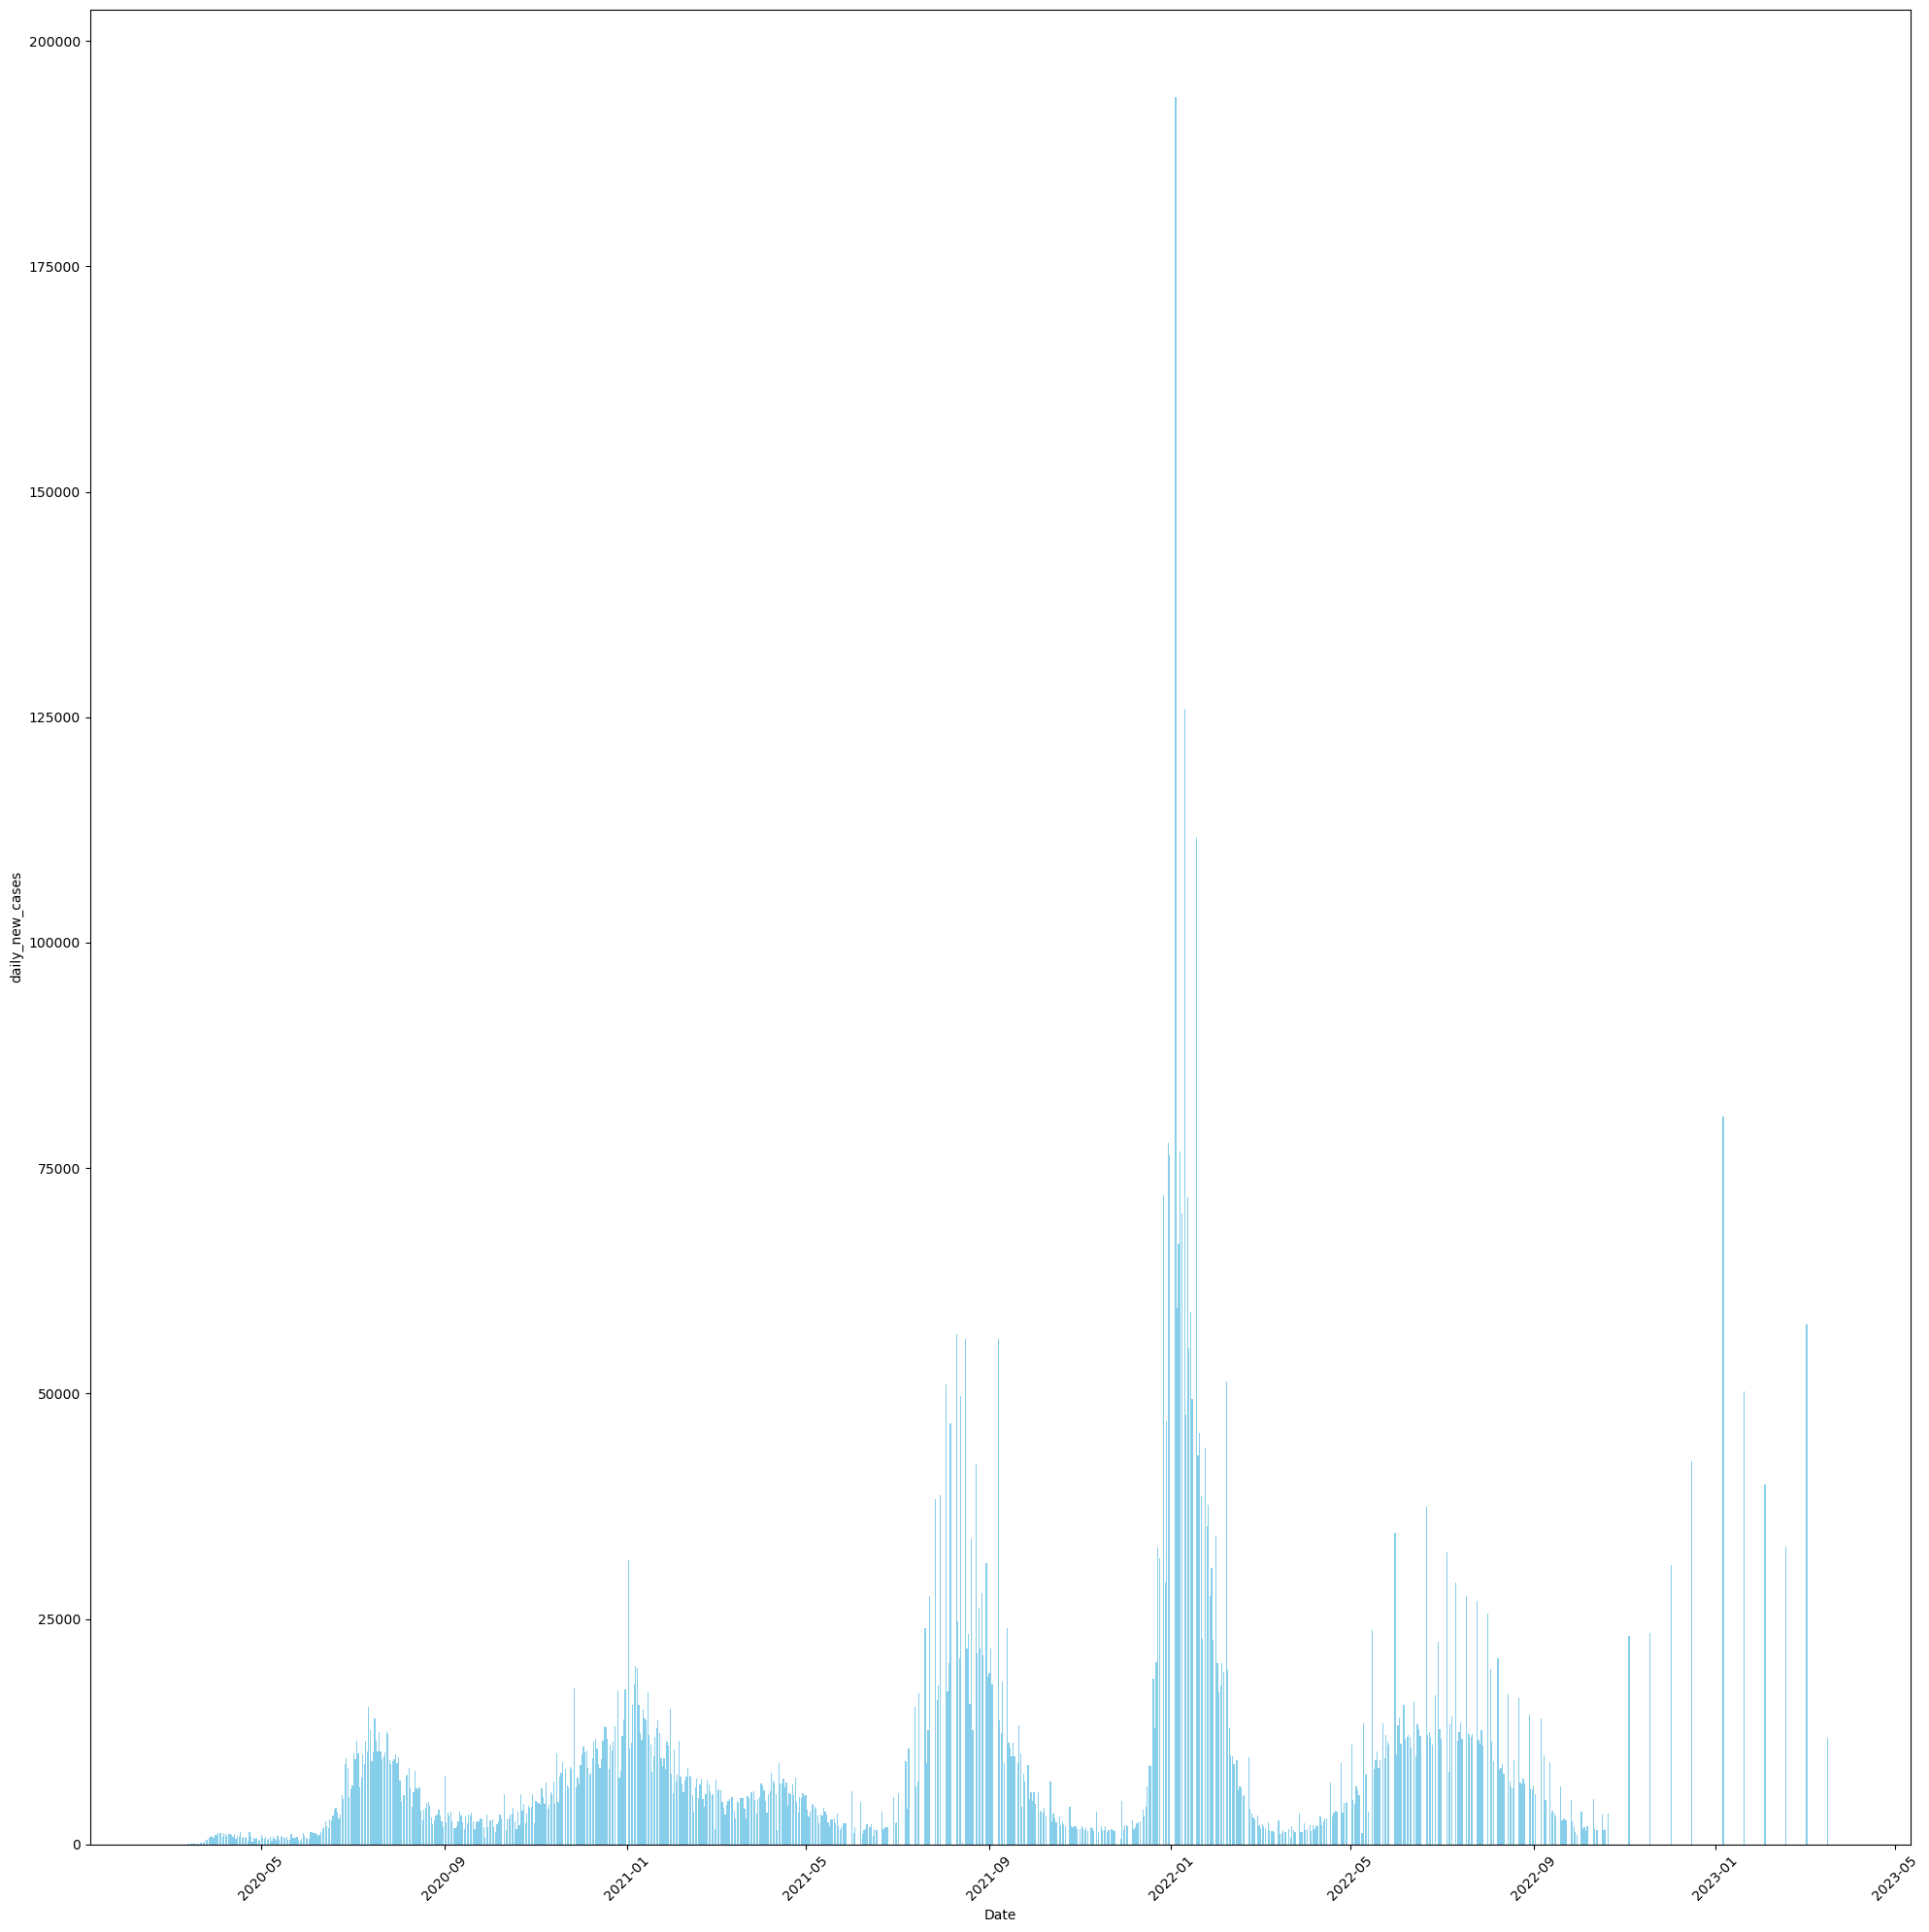

In [38]:
# daily_new_cases is greater than zero
filtered_df_fl = data_Fl_clean_df_day[data_Fl_clean_df_day['daily_new_cases'] > 0]

# Create a bar chart 
plt.figure(figsize=(20, 20))
plt.bar(filtered_df_fl['date'], filtered_df_fl['daily_new_cases'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('daily_new_cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

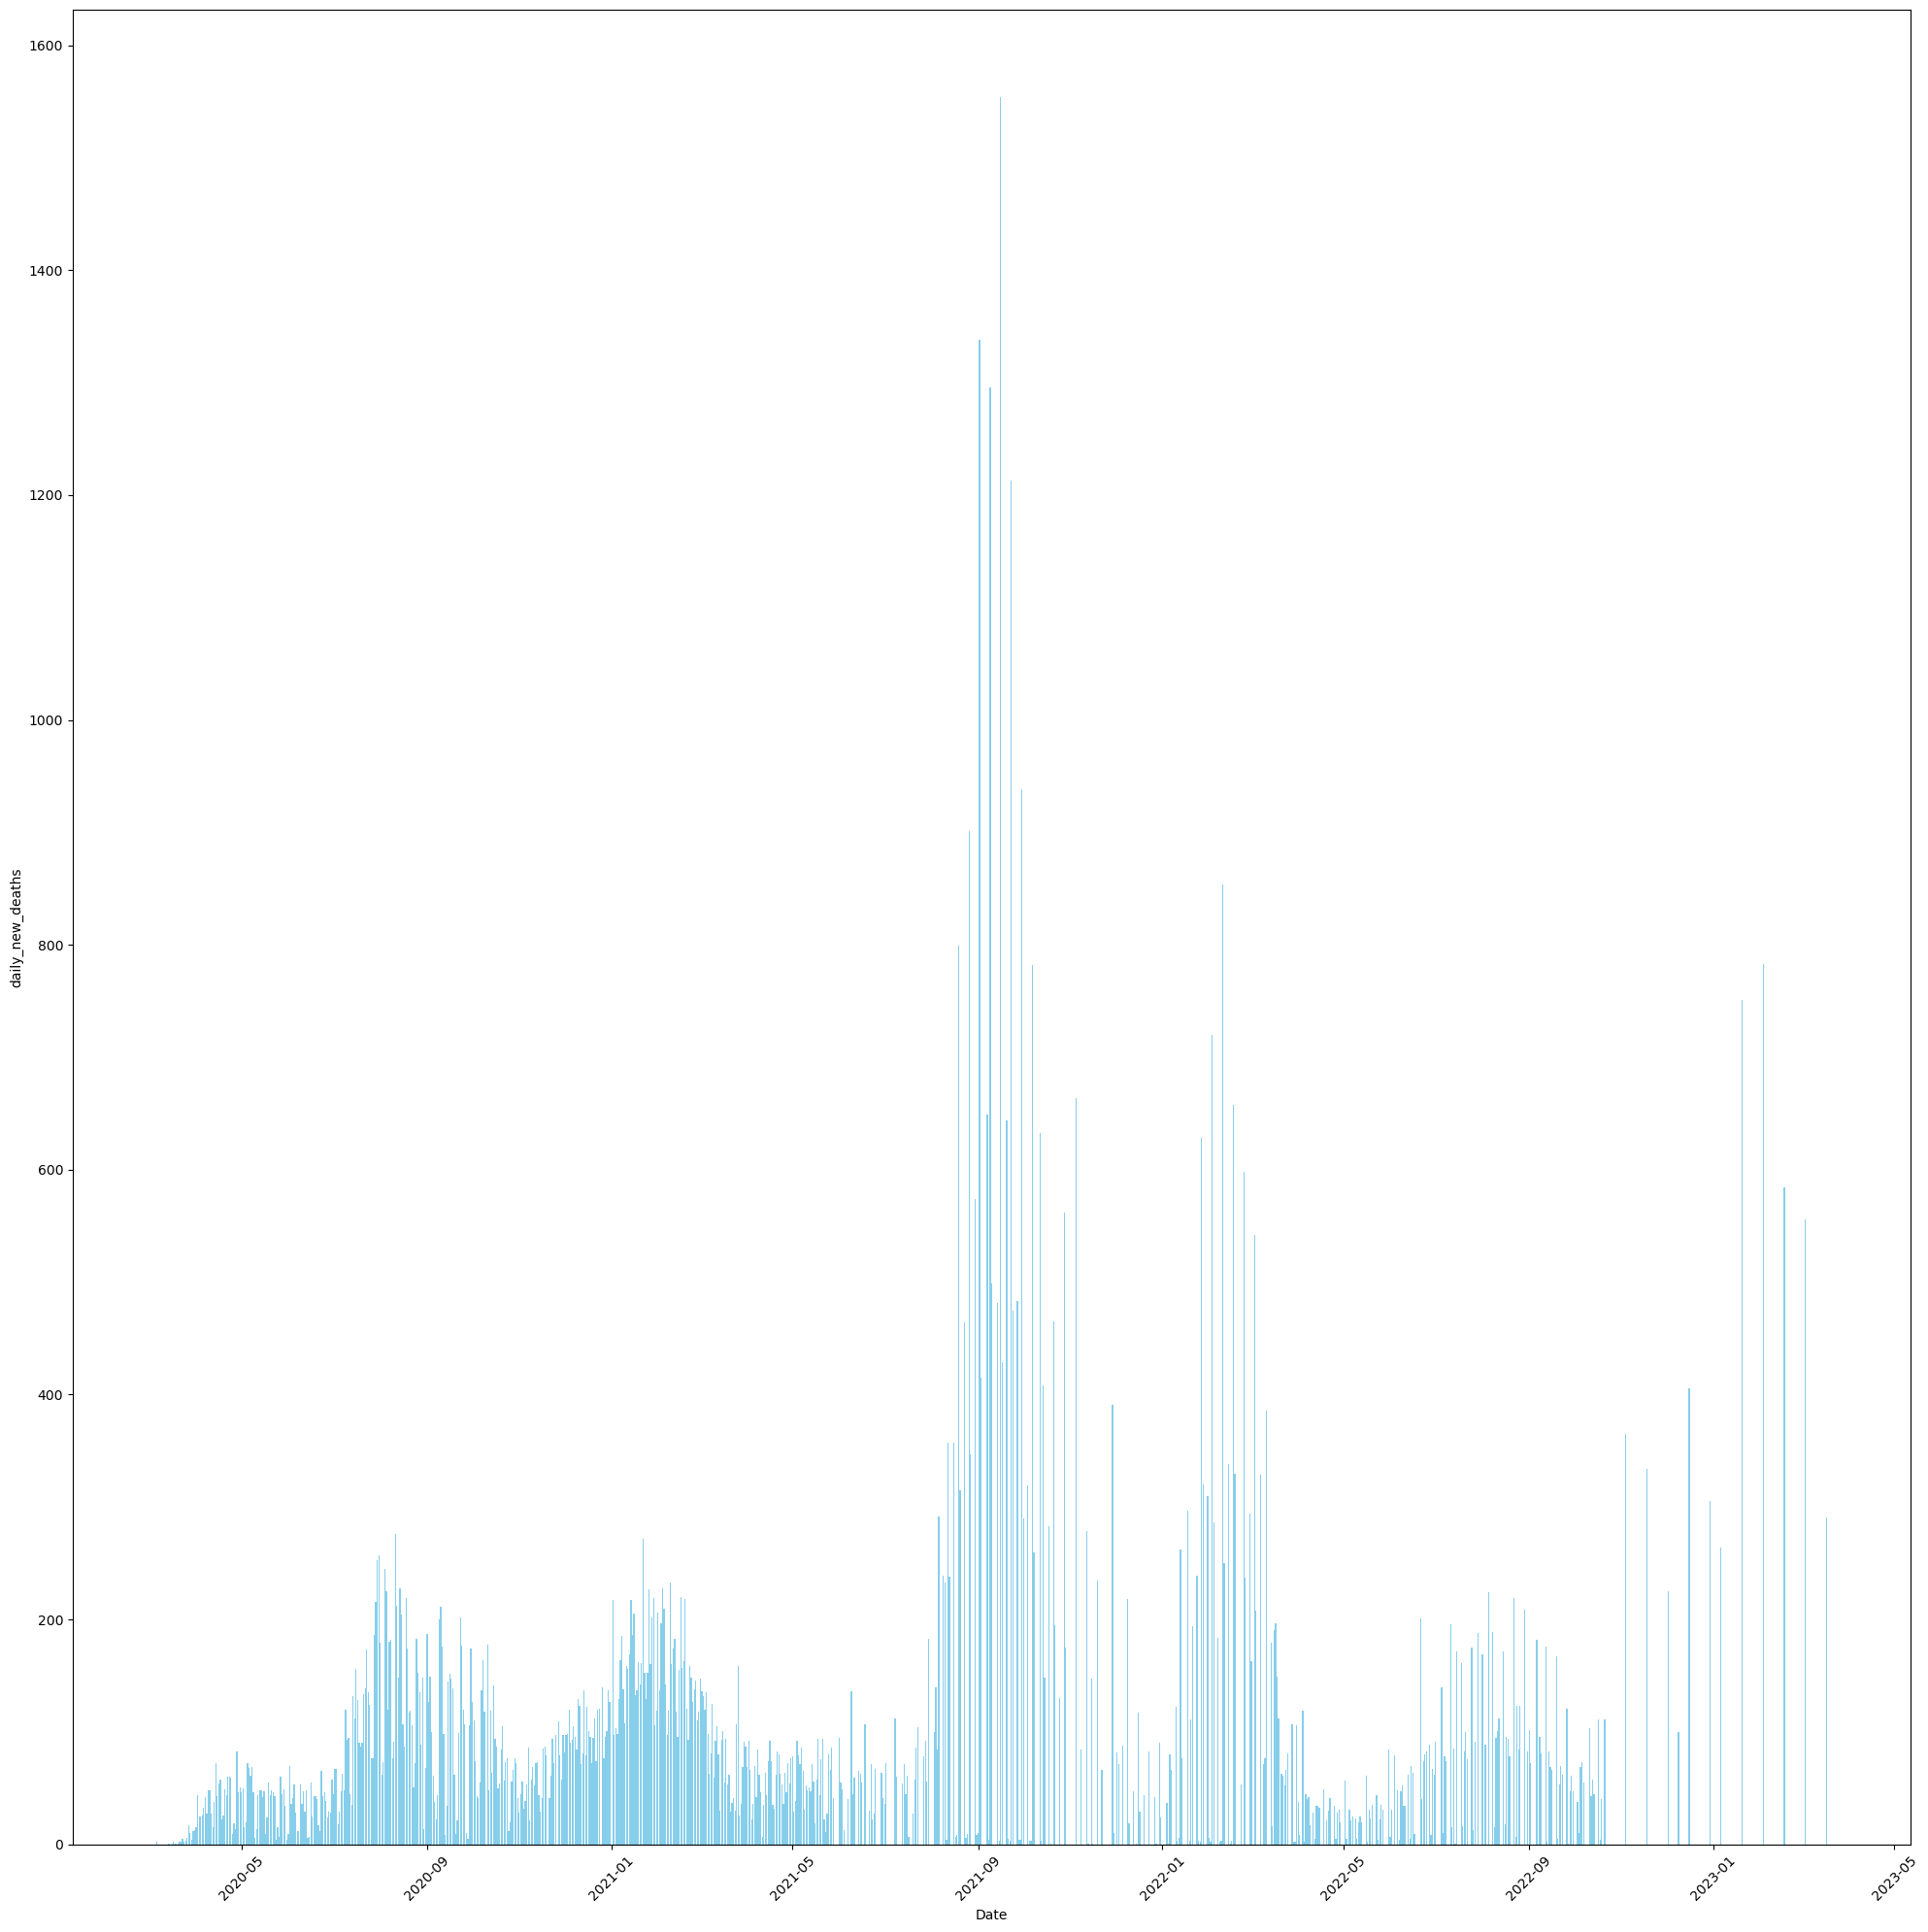

In [39]:
# daily_new_deaths is greater than zero
filtered_df_fl = data_Fl_clean_df_day[data_Fl_clean_df_day['daily_new_deaths'] > 0]

# Create a bar chart 
plt.figure(figsize=(20, 20))
plt.bar(filtered_df_fl['date'], filtered_df_fl['daily_new_deaths'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('daily_new_deaths')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()